In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [93]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [94]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', 800)

# Downloading and reading metadata:

In [8]:

url = 'https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv'
# df = pd.read_csv(url, error_bad_lines=False)
import requests

csv_url = "https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv"
req = requests.get(csv_url)

url_content = req.content

csv_file = open('downloaded.csv', 'wb')

csv_file.write(url_content)

csv_file.close()
df = pd.read_csv("downloaded.csv")

In [9]:
df.shape

(950, 30)

In [10]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [11]:
df.dtypes

patientid                  object
offset                    float64
sex                        object
age                       float64
finding                    object
RT_PCR_positive            object
survival                   object
intubated                  object
intubation_present         object
went_icu                   object
in_icu                     object
needed_supplemental_O2     object
extubated                  object
temperature               float64
pO2_saturation            float64
leukocyte_count           float64
neutrophil_count          float64
lymphocyte_count          float64
view                       object
modality                   object
date                       object
location                   object
folder                     object
filename                   object
doi                        object
url                        object
license                    object
clinical_notes             object
other_notes                object
Unnamed: 29   

In [12]:
dfs = df.loc[df['survival'] == 'Y']
dfs.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,257.000000,192.000000,29.000000,50.000000,7.000000,14.000000,16.000000
mean,14.548638,49.885417,37.875862,82.306000,5.061429,5.460714,1.178875
std,26.218258,14.920642,0.971617,35.786045,3.131770,3.262864,0.590746
min,-10.000000,18.000000,36.000000,25.000000,2.850000,1.630000,0.400000
25%,3.000000,39.000000,37.200000,57.500000,3.005000,2.800000,0.790500
50%,7.000000,50.000000,38.000000,88.650000,3.980000,5.150000,1.100000
75%,15.000000,60.000000,38.500000,97.000000,5.695000,6.725000,1.450000
max,240.000000,84.000000,39.600000,175.000000,11.200000,11.000000,2.700000


In [13]:
dfs = df.loc[df['survival'] == 'N']
dfs.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,64.000000,50.000000,9.000000,7.000000,1.00,2.000000,2.000000
mean,6.562500,63.380000,38.533333,104.000000,0.22,12.450000,0.950000
std,6.596957,17.308592,0.772981,106.287346,NaN,0.636396,0.070711
min,-7.000000,21.000000,37.500000,40.000000,0.22,12.000000,0.900000
25%,2.750000,45.500000,38.000000,45.000000,0.22,12.225000,0.925000
50%,6.000000,72.000000,38.300000,85.000000,0.22,12.450000,0.950000
75%,9.000000,78.000000,39.000000,86.500000,0.22,12.675000,0.975000
max,35.000000,94.000000,40.000000,340.000000,0.22,12.900000,1.000000


In [14]:
# Dropping duplicate patients for count
df['patientid'].nunique()

472

In [15]:
df1 = df.drop_duplicates(subset=['patientid'])

In [16]:
df1.shape

(472, 30)

<AxesSubplot:>

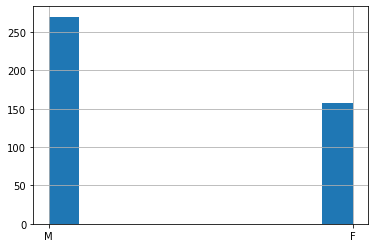

In [17]:
df1.sex.hist()

<AxesSubplot:>

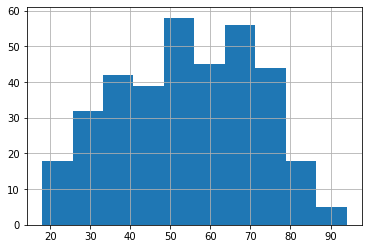

In [18]:
df1.age.hist()

In [19]:
df1.view.value_counts()

PA           224
AP           124
AP Supine     98
Axial         23
L              2
AP Erect       1
Name: view, dtype: int64

<AxesSubplot:>

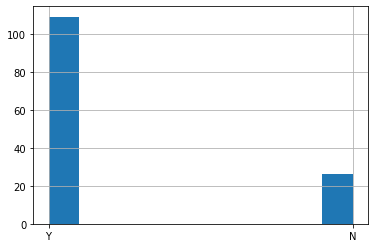

In [20]:
df1.survival.hist()

In [21]:
df1['finding'].value_counts()

Pneumonia/Viral/COVID-19                   307
Pneumonia                                   39
todo                                        25
No Finding                                  17
Pneumonia/Fungal/Pneumocystis               17
Tuberculosis                                10
Pneumonia/Bacterial/Streptococcus            9
Pneumonia/Viral/SARS                         8
Pneumonia/Lipoid                             6
Pneumonia/Bacterial/Legionella               6
Pneumonia/Bacterial/Klebsiella               5
Pneumonia/Viral/MERS-CoV                     4
Pneumonia/Bacterial/Mycoplasma               3
Pneumonia/Viral/Influenza                    3
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Viral/Varicella                    2
Unknown                                      1
Pneumonia/Bacterial/Nocardia                 1
Pneumonia/Bacterial/E.Coli                   1
Pneumonia/Aspiration                         1
Pneumonia/Viral/Herpes                       1
Pneumonia/Bac

In [22]:
dfcov = df1['finding'] == 'Pneumonia/Viral/COVID-19'
dfc = df1[dfcov]
covidp_images = list(dfc.filename)
len(covidp_images)
covidp_img = ["Covid"+x for x in covidp_images]

In [23]:
df1.corr()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
offset,1.000000,0.051915,0.084707,0.264977,-0.156749,0.233237,0.068481
age,0.051915,1.000000,0.192259,-0.131494,0.492587,0.596002,0.653533
temperature,0.084707,0.192259,1.000000,-0.275499,0.119528,0.575253,-0.373459
pO2_saturation,0.264977,-0.131494,-0.275499,1.000000,-0.844946,0.079521,0.483623
leukocyte_count,-0.156749,0.492587,0.119528,-0.844946,1.000000,0.994478,-0.061150
neutrophil_count,0.233237,0.596002,0.575253,0.079521,0.994478,1.000000,0.130692
lymphocyte_count,0.068481,0.653533,-0.373459,0.483623,-0.061150,0.130692,1.000000


We can conclude that we do not have enough data to arrive at tangible conclusions for a proper Covid/Non-Covid or Survived/Did not Survive classifier. 

In [24]:
# Plotting Survival
import seaborn as sns


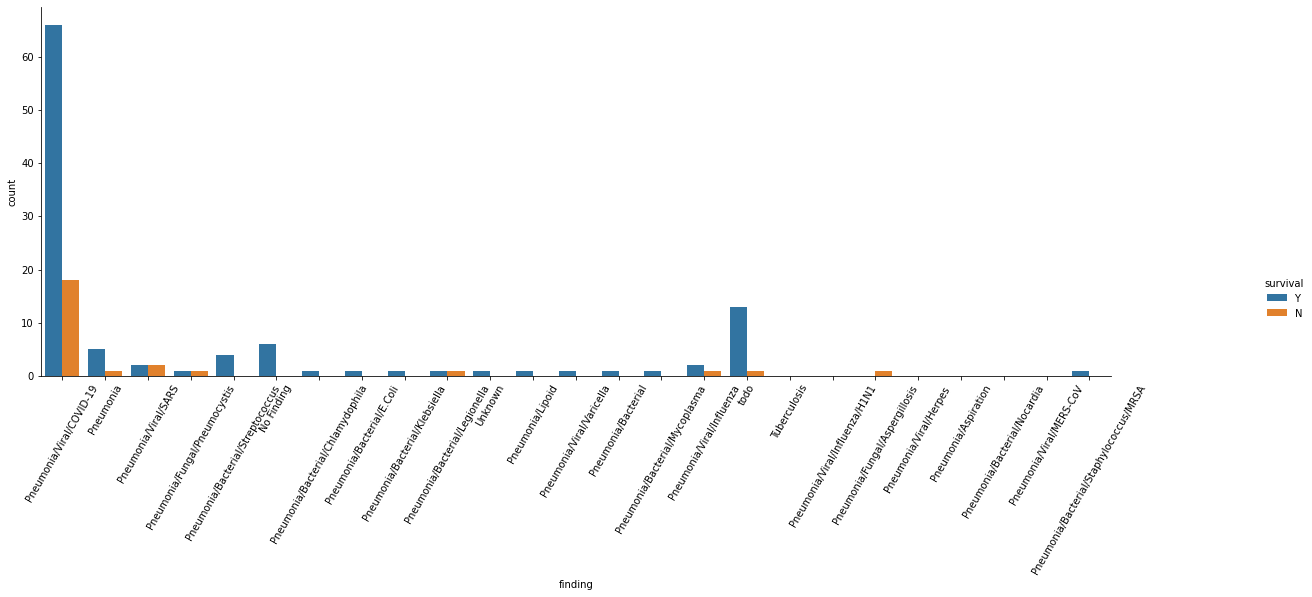

In [25]:
bar = sns.catplot(x = 'finding', kind = 'count', hue= 'survival', data = df1)
plt.gcf().set_size_inches(22, 6)
bar.set_xticklabels(rotation = 60)

# Constructing the Classifier - kNN/SVM

Preprocessing: Filling  Nan

In [26]:
for i in list(df1.columns):
    print(i, df1[i].isnull().sum())
# Leukocyte, neutrophil, lymphocyte, need supplemental, pO2 saturation have very less values

patientid 0
offset 153
sex 44
age 115
finding 0
RT_PCR_positive 157
survival 337
intubated 374
intubation_present 375
went_icu 311
in_icu 347
needed_supplemental_O2 438
extubated 460
temperature 407
pO2_saturation 387
leukocyte_count 456
neutrophil_count 455
lymphocyte_count 446
view 0
modality 0
date 132
location 33
folder 0
filename 0
doi 285
url 0
license 147
clinical_notes 85
other_notes 236
Unnamed: 29 470


In [27]:
df1['survival'].value_counts()

Y    109
N     26
Name: survival, dtype: int64

In [28]:
df1['survival'].notna().sum()

135

In [29]:
dfn = df1.dropna(subset=['survival'])
dfn.shape

(135, 30)

Preprocessing: Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# for cat in ['']
dfn['survival'] = class_le.fit_transform(dfn['survival'].astype(str))
dfn['RT_PCR_positive'] = class_le.fit_transform(dfn['RT_PCR_positive'].astype(str))
dfn['intubated'] = class_le.fit_transform(dfn['intubated'].astype(str))
dfn['intubation_present'] = class_le.fit_transform(dfn['intubation_present'].astype(str))
dfn['went_icu'] = class_le.fit_transform(dfn['went_icu'].astype(str))
dfn['in_icu'] = class_le.fit_transform(dfn['in_icu'].astype(str))
dfn['needed_supplemental_O2'] = class_le.fit_transform(dfn['needed_supplemental_O2'].astype(str))
dfn['extubated'] = class_le.fit_transform(dfn['extubated'].astype(str))

C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [31]:
dfn.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,1,1,0,0,0,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,2,0,2,2,2,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN
12,7,7.0,F,29.0,Pneumonia/Viral/SARS,2,1,2,2,2,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 29-year-old woman who presented 7 da...,NaN,NaN
17,10,19.0,F,73.0,Pneumonia/Viral/SARS,2,0,2,2,2,...,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 73-year-old woman who presented 17 d...,NaN,NaN
20,11,0.0,M,56.0,Pneumonia/Viral/COVID-19,1,1,2,2,2,...,2020,"Sunnybrook Health Sciences Centre, Toronto, On...",images,1-s2.0-S0140673620303706-fx1_lrg.jpg,10.1016/S0140-6736(20)30370-6,https://www.sciencedirect.com/science/article/...,NaN,A 56-year-old man presented to our Emergency D...,NaN,NaN


In [32]:
df.corr()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
offset,1.000000,-0.001992,0.085304,0.164643,-0.156749,0.148430,-0.009622
age,-0.001992,1.000000,0.176245,-0.174707,0.492587,0.596002,0.528551
temperature,0.085304,0.176245,1.000000,-0.224417,0.119528,0.575253,-0.342545
pO2_saturation,0.164643,-0.174707,-0.224417,1.000000,-0.844946,0.226702,0.263767
leukocyte_count,-0.156749,0.492587,0.119528,-0.844946,1.000000,0.994478,-0.061150
neutrophil_count,0.148430,0.596002,0.575253,0.226702,0.994478,1.000000,0.039701
lymphocyte_count,-0.009622,0.528551,-0.342545,0.263767,-0.061150,0.039701,1.000000


In [31]:
cols = list(df.columns.values)
cols.pop(cols.index('survival')) 
df = df[cols+['survival']] 
#Create new dataframe with Survival as last column

In [32]:
X = dfn.iloc[:, 0 :20].values #eliminating all image related columns in metadata
y = dfn.iloc[:, -1].values
X.shape

(135, 20)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=10)
# fit = test.fit(X, y)
# summarize scores

print(fit.scores_)
# features = fit.transform(X)
# summarize selected features
# print(features[0:11,:])
# X_n = SelectKBest(chi2, k=5).fit_transform(X, y)
# X_n

Discarded due to lack of values


# Constructing the CNN for the images:

In [33]:
import os
import random
import cv2
%matplotlib inline
import tensorflow as tf
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import AveragePooling2D
import glob
import shutil

seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)

In [34]:
df1.view.value_counts()

PA           224
AP           124
AP Supine     98
Axial         23
L              2
AP Erect       1
Name: view, dtype: int64

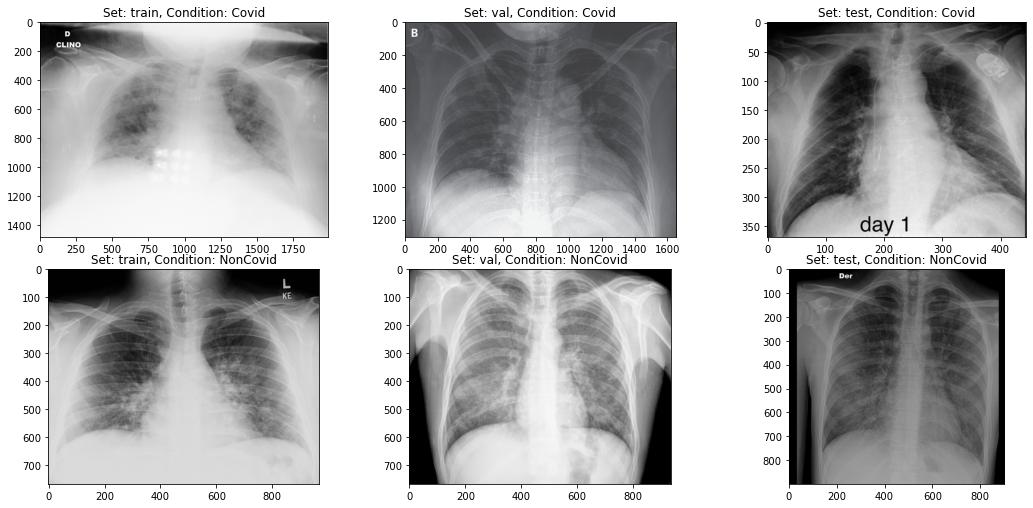

In [45]:
# Moving images into separate folders
# Copying images with PA view and Covid19 to Covid and others with PA view to Noncovid

samples = 25
covid_dataset_path = r'\covid-chestxray-dataset-master(1)\covid-chestxray-dataset-master'
dataset_path = r'\covid-chestxray-dataset-master(1)\covid-chestxray-dataset-master\images'
csvPath = os.path.sep.join([covid_dataset_path, "metadata.csv"])
df = pd.read_csv(csvPath)

# Covid 

for (i, row) in df.iterrows():
    if row["finding"] != "Pneumonia/Viral/COVID-19" or row["view"] != "PA":
        continue

    # path to the input image file
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/covid", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

    
# NonCovid    
    
for (i, row) in df.iterrows():
    if row["finding"] == "Pneumonia/Viral/COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/normal", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)


direc = r"C:/Users/buvan/Downloads/Chest-Xray/covid-chestxray-dataset-master/images/"
Cov = direc+ "Covid"
Noncov = direc +"NonCovid"
listdirs = os.listdir(direc)
input_path = direc
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Covid/'+os.listdir(set_path+'/Covid')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Covid'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/NonCovid/'+os.listdir(set_path+'/NonCovid')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: NonCovid'.format(_set))

In [95]:
# No. of images per set for only AP images
direc = r"C:/Users/buvan/Downloads/Chest-Xray/covid-chestxray-dataset-master/images/"

for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(direc + _set + '/Covid'))
    n_infect = len(os.listdir(direc + _set + '/NonCovid'))
    print('Set: {}, Covid images: {}, NonCovid images: {}'.format(_set, n_normal, n_infect))

Set: train, Covid images: 312, NonCovid images: 236
Set: val, Covid images: 40, NonCovid images: 30
Set: test, Covid images: 40, NonCovid images: 30


In [96]:
def process_data(img_dims, batch_size):
    # Data generation objects
    train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    # This is fed to the network in the specified batch sizes and image dimensions
    train_gen = train_datagen.flow_from_directory(
    directory=direc+'train', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)

    test_gen = test_val_datagen.flow_from_directory(
    directory=direc+'test', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)
    
    # I will be making predictions off of the test set in one batch size
    # This is useful to be able to get the confusion matrix
    test_data = []
    test_labels = []
    label = 0
    target_input = (150, 150, 3)
    for cond in ['\\Covid\\', '\\NonCovid\\']:
        for img in (os.listdir(direc + '\\test' + cond)):
            img = plt.imread(direc+'\\test'+cond+img, 0)
# #             img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#             img = cv2.resize(img, (img_dims, img_dims))
#             img = np.dstack([img, img, img])
#             img = img.astype('float32') / 255
#             print(img.shape)
            if cond=='/Covid/':
                label = 0
            elif cond=='/NonCovid/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    
    return train_gen, test_gen, test_data, test_labels

In [97]:
img_dims = 150
epochs = 10
batch_size = 32

train_gen, test_gen, test_data, test_labels = process_data(img_dims, batch_size)

Found 548 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [98]:
inputs = Input(shape=(img_dims, img_dims, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(x)

# Creating model and compiling
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')
model.summary()



Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 75, 75, 32)        688       
_________________________________________________________________
separable_conv2d_9 (Separabl (None, 75, 75, 32)        1344      
_________________________________________________________________
batch_normalization_4 (Batch (None, 75, 75, 32)      

In [99]:
hist = model.fit_generator(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

Epoch 1/10
17/17 [==============================] - 25s 1s/step - loss: 0.6946 - accuracy: 0.5620 - val_loss: 0.6859 - val_accuracy: 0.5625
Epoch 2/10
17/17 [==============================] - 21s 1s/step - loss: 0.6863 - accuracy: 0.5678 - val_loss: 0.6781 - val_accuracy: 0.5938
Epoch 3/10
17/17 [==============================] - 21s 1s/step - loss: 0.6857 - accuracy: 0.5698 - val_loss: 0.6869 - val_accuracy: 0.5625
Epoch 4/10
17/17 [==============================] - 21s 1s/step - loss: 0.6947 - accuracy: 0.5640 - val_loss: 0.6767 - val_accuracy: 0.6094
Epoch 5/10
17/17 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5717
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
17/17 [==============================] - 21s 1s/step - loss: 0.6906 - accuracy: 0.5717 - val_loss: 0.6812 - val_accuracy: 0.5781
Epoch 6/10
17/17 [==============================] - 21s 1s/step - loss: 0.6827 - accuracy: 0.5640 - val_loss: 0.6771 - val_accuracy: 0.59

In [137]:
model.output_shape

(None, 150, 150, 1)

In [100]:
# Using VGG to improve accuracy
from tensorflow.keras.applications.vgg16 import VGG16


inputs = Input(shape=(img_dims, img_dims, 3))



model = VGG16(weights='imagenet', include_top=False)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='Imagenet', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [139]:
# This code runs while the other VGG16 produces "train function error"
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import AveragePooling2D


baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will becomethe actual model we will train)
# First conv block
# headModel = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
# headModel = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
# headModel = MaxPool2D(pool_size=(2, 2))(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(headModel)

model = Model(inputs=baseModel.input, outputs=output)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False
    
    
# from tensorflow.keras.applications.resnet50 import ResNet50

# baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# # construct the head of the model that will be placed on top of the
# # the base model
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(64, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(2, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
# model = Model(inputs=baseModel.input, outputs=headModel)
# # loop over all layers in the base model and freeze them so they will
# # *not* be updated during the first training process
# for layer in baseModel.layers:
#     layer.trainable = False    

In [141]:
INIT_LR = 1e-3
EPOCHS = 20
BS = 8

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=EPOCHS, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
17/17 [==============================] - 23s 1s/step - loss: 0.6867 - accuracy: 0.5659 - val_loss: 0.6863 - val_accuracy: 0.5625
Epoch 2/20
17/17 [==============================] - 23s 1s/step - loss: 0.6819 - accuracy: 0.5736 - val_loss: 0.6925 - val_accuracy: 0.5469
Epoch 3/20
17/17 [==============================] - 23s 1s/step - loss: 0.6789 - accuracy: 0.5756 - val_loss: 0.6774 - val_accuracy: 0.5781
Epoch 4/20
17/17 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.5717
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
17/17 [==============================] - 26s 2s/step - loss: 0.6797 - accuracy: 0.5717 - val_loss: 0.6683 - val_accuracy: 0.5938
Epoch 5/20
17/17 [==============================] - 24s 1s/step - loss: 0.6791 - accuracy: 0.5736 - val_loss: 0.6798 - val_accuracy: 0.5625
Epoch 6/20
17/17 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 

In [119]:
print(model.output)

Tensor("block5_pool/MaxPool_2:0", shape=(None, None, None, 512), dtype=float32)


Plotting the Accuracies

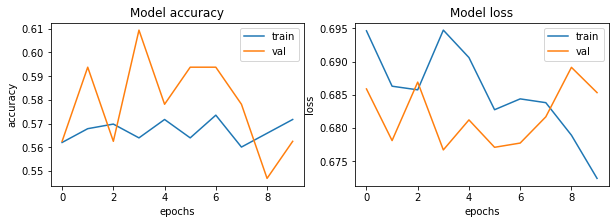

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(train_gen)

acc = accuracy_score(test_gen, np.round(preds))*100
cm = confusion_matrix(test_gen, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((hist.history['acc'][-1])*100, 2)))

Visualising the layers

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_gen)

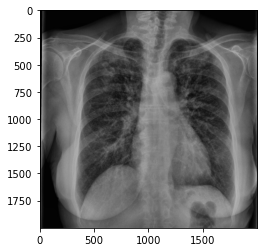

(1, 2000, 2000, 3)
(32, 150, 150, 3)


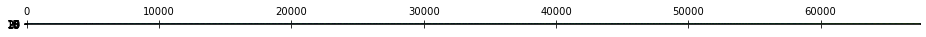

In [167]:
from keras.preprocessing.image import load_img

# load the image
img_path = r'C:\Users\buvan\Downloads\Chest-Xray\covid-chestxray-dataset-master\images\test\Covid\d009d61f.jpg'
img = load_img(img_path)
# img = image.lo(img_path, target_size=(28, 28))
# img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
# classes = classifier.predict_classes(images, batch_size=10)
# print("Predicted class is:",classes)
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
# activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) 
first_layer_activation = activations[0]
print(first_layer_activation.shape)
first_layer_activation = first_layer_activation.reshape(32, 150*150*3)
plt.matshow(first_layer_activation, cmap='viridis')
# for x in decode_predictions(first_layer_activation[]):
#     print(x)

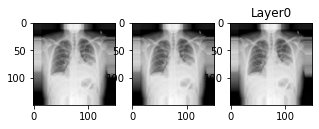

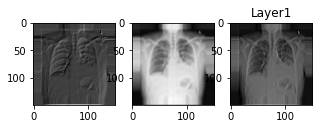

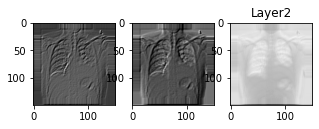

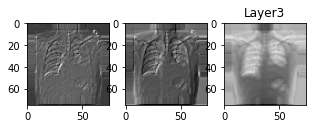

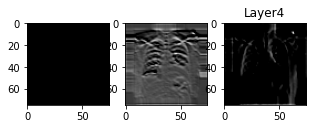

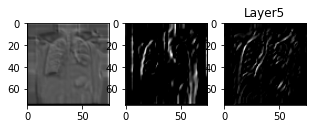

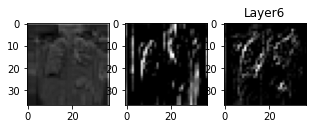

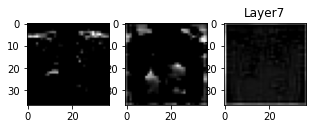

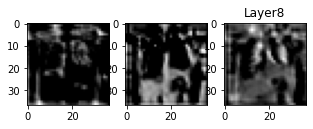

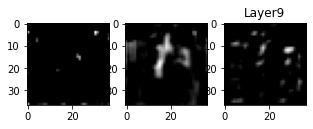

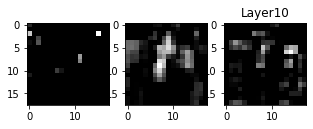

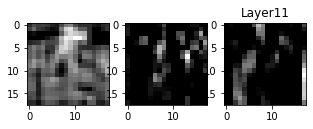

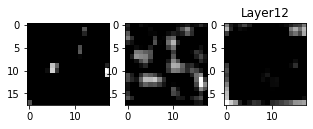

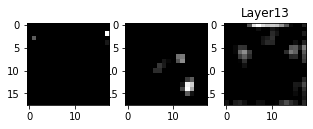

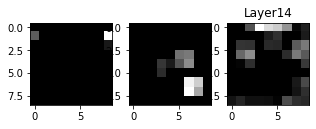

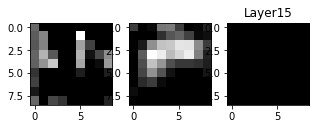

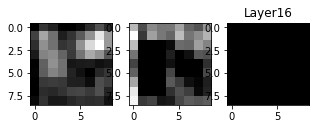

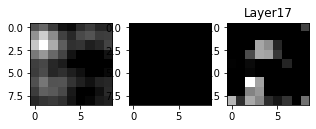

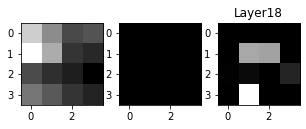

In [148]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*5,col_size*5),squeeze=False)
    for col in range(0,col_size):
#         print("Layer"+str(i))
        for row in range(0,row_size):       
            ax[row][col].imshow(activation[31, :, :, activation_index], cmap='gray')
            plt.title('Layer'+str(i))
            activation_index += 1
            

for i in range(19):
    
    display_activation(activations, 3, 1, i)        

# Explainability:

In [144]:
# Explainability with Keras

import keras
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.4.3


In [ ]:
activation = activations[]
for x in decode_predictions(first_layer_activation[]):
    print(x)

In [165]:
# Explainability with Lime
from lime import lime_image

In [166]:
explainer = lime_image.LimeImageExplainer()

In [171]:
images[0].

(2000, 2000, 3)

In [170]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), activation_model.predict, top_labels=2, hide_color=0)

ValueError: in user code:

    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\buvan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_42 is incompatible with the layer: expected axis -1 of input shape to have value 512 but received input with shape [None, 115200]


Discarded code

In [8]:
# # grab the list of images in our dataset directory, then initialize
# # the list of data (i.e., images) and class images
# print("[INFO] loading images...")
# imagePaths = list(paths.list_images(dataset_path))
# data = []
# labels = []
# # loop over the image paths
# for imagePath in imagePaths:
#     # extract the class label from the filename
#     label = imagePath.split(os.path.sep)[-2]
#     # load the image, swap color channels, and resize it to be a fixed
#     # 224x224 pixels while ignoring aspect ratio
#     image = cv2.imread(imagePath)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.resize(image, (224, 224))
#     # update the data and labels lists, respectively
#     data.append(image)
#     labels.append(label)  
# # convert the data and labels to NumPy arrays while scaling the pixel
# # intensities to the range [0, 1]
# data = np.array(data)
# labels = np.array(labels)
# print("[INFO] loaded")

[INFO] loading images...
[INFO] loaded


In [26]:
# data1 = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
# labels1 = labels.reshape(labels.shape[0], labels.shape[1]*labels.shape[2])
# print(labels1.shape)
# print(data1.shape)


(1274, 6)
(1274, 50176)


In [27]:
# perform one-hot encoding on the labels
# lb = LabelBinarizer()
# labels1 = lb.fit_transform(labels1)
# labels1 = to_categorical(labels1.astype(int))
# print(labels1.shape)
# labels1 = labels1.reshape(labels1.shape[0], labels1.shape[1]*labels1.shape[2])
# # partition the data into training and testing splits using 80% of
# # the data for training and the remaining 20% for testing
# (trainX, testX, trainY, testY) = train_test_split(data1, labels1, test_size=0.20, stratify=labels1, random_state=42)
# # initialize the training data augmentation object
# trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

(1274, 6, 2)


In [63]:
# dim2 = int(trainX.shape[1]**0.5)
# trainX1 = trainX.reshape(trainX.shape[0], dim2, dim2, 1)
# trainX1.shape
# # dim3 = int(trainY.shape[1]/2)
# trainY1 = trainY.reshape(trainY.shape[0], trainY.shape[1], 2, 1)
# trainY1.shape

(1019, 224, 224, 1)

In [ ]:
# for file in listdirs:
#     if re.match(r"^Covid", file):
# #         if file in covidp_images:
#         shutil.copy(direc+file, Cov)
#     else:
#         shutil.copy(direc+file, Noncov)



# val_ratio = 0.15
# test_ratio = 0.05
# allFileNames = os.listdir(Cov)
# np.random.shuffle(allFileNames)
# train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                           [int(len(allFileNames)* (1 - val_ratio + test_ratio)), 
#                                                            int(len(allFileNames)* (1 - test_ratio))])


# train_FileNames = [Cov+'/'+ file for file in train_FileNames.tolist()]
# val_FileNames = [Cov+'/' + file for file in val_FileNames.tolist()]
# test_FileNames = [Cov+'/' + file for file in test_FileNames.tolist()]
# print('Total images: ', len(allFileNames))
# print('Training: ', len(train_FileNames))
# print('Validation: ', len(val_FileNames))
# print('Testing: ', len(test_FileNames))

# # Copy-pasting images
# for file in train_FileNames:
#     shutil.copy(file, Cov +'/train' )

# for file in val_FileNames:
#     shutil.copy(file, Cov +'/val' )

# for file in test_FileNames:
#     shutil.copy(file, Cov +'/test')

# Cov = r"C:\Users\buvan\Downloads\Chest-Xray\covid-chestxray-dataset-master\images\covid"
# # output = r"C:\Users\buvan\Downloads\Chest-Xray\covid-chestxray-dataset-master\images\covid"
# import splitfolders
# splitfolders.ratio(Cov, seed=1337, ratio=(.8, 0.1,0.1)) 

# normal_images = list(paths.list_images(f"{dataset_path}/normal"))
# covid_images = list(paths.list_images(f"{dataset_path}/covid"))
# plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")
# plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")